# TED Talks Data exploration

Not too long ago, I made a half-joking bet with someone that I'd give a TED talk in the next five years. Having yet to make any progress towards that goal, I think exploring the past TED talks and understanding the characteristics of a popular talk is a good place to start. 

## Data

The TED Talks [dataset](https://www.kaggle.com/rounakbanik/ted-talks) contains information on all the audio-video recordings of TED Talks uploaded to the official [TED.com](https://www.TED.com) website until September 21st, 2017.

The data was compiled by Rounak Banik from the official TED website, published on Kaggle, and it contains two files:

 * ted_main.csv - Contains metadata on each talk and speaker. 
 * transcripts.csv - Contains transcript and URL information for TED Talks.

For this study, I'm focusing on the metadata for the talks, and not using the transcripts.

##### The data, ted_main.csv is a flat file where each row is a unique talk, and it contains the following variables for each talk:

**Comments** - the number of comments from users on the site.  
**Description** - a brief description of the talk.  
**Duration** - duration in seconds.  
**Event** - the event where the talk took place.    
**Film date** - a Unix timestamp of the film date.   
**Languages** - the number of languages in which the talk is available.  
**Main speaker** - the first named speaker of the talk.  
**Name** - the official name of the talk including speaker and title.  
**Number of speakers** - the number of speakers in the talk.  
**Published date** - a Unix timestamp of the date it was published on ted.com.  
**Ratings** - a dictionary of the various ratings given to the talk by viewers.  
**Related talks** - a list of dictionaries of recommended talks to watch next.  
**Speaker occupation** - the occupation of the main speaker.  
**Tags** - the themes assosciated with the talk.  
**Title** - the title of the talk.  
**Url** - the url of the talk.  
**Views** - the number of views.


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
palette = ['#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695']
sns.set_palette(palette)

## Let's read in the data and take a look at it

In [3]:
ted = pd.read_csv("ted_main.csv")

In [4]:
ted.shape

(2550, 17)

##### The data has **2550** observations and the **17** previously described columns.  
### Let's see what the head looks like

In [5]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


#### Looking at the output of the describe method, you can see that for comments, duration, and views, the max values are much higher than the means. Getting a real picture of the data through summary statistics might be difficult due to the extreme values.  

# Let's take a look at some of the variables

### Comments
As stated above, comments is a column of integers that shows the number of comments each talk received. Let's see what the distribution of the variable is.

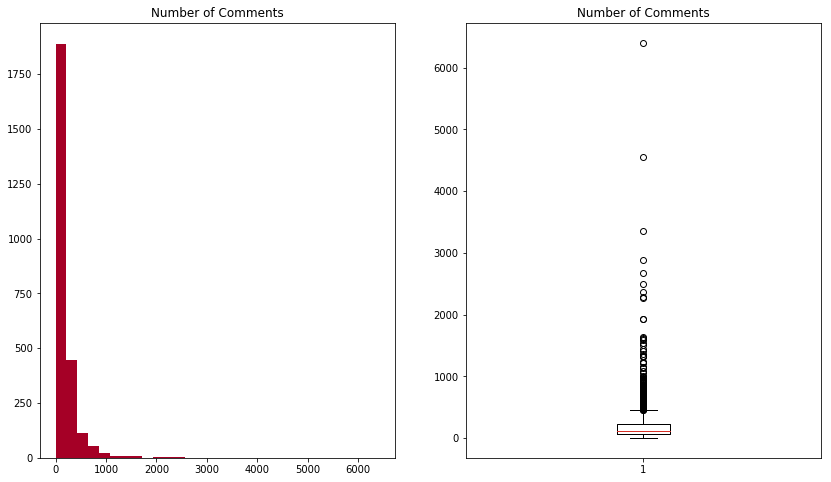

In [6]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['comments'], bins=30)
plt.title('Number of Comments')

plt.subplot(1, 2, 2)
plt.boxplot(ted['comments'])
plt.title('Number of Comments')

plt.show()

##### There seems to be lots of extreme outliers that hinder the effectiveness of the plots. Let's see what it looks like when we remove the top 5%.

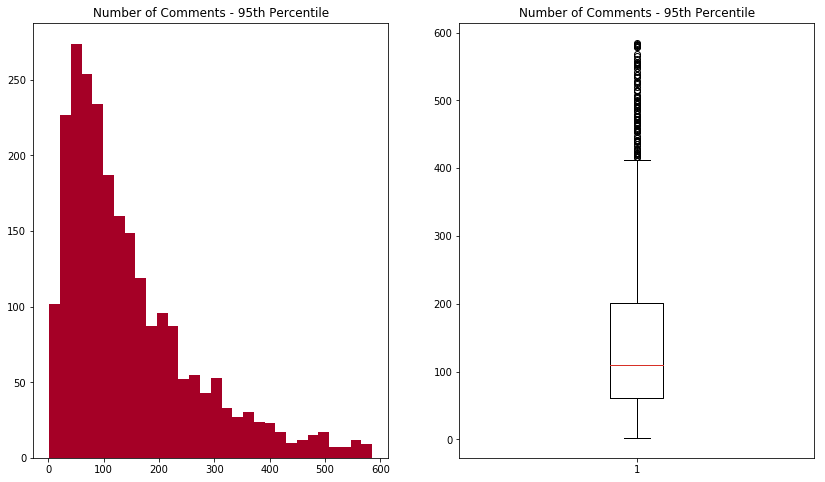

In [31]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['comments'][ted['comments'] < ted['comments'].quantile(.95)], bins=30)
plt.title('Number of Comments - 95th Percentile')

plt.subplot(1, 2, 2)
plt.boxplot(ted['comments'][ted['comments'] < ted['comments'].quantile(.95)].reset_index(drop=True))
plt.title('Number of Comments - 95th Percentile')

plt.show()

##### That's better! The plots are a lot more visually informative without the extreme values at the top.  


### Duration
Duration is a column that represents the length of the talk in seconds. Let's look at the the distribution.

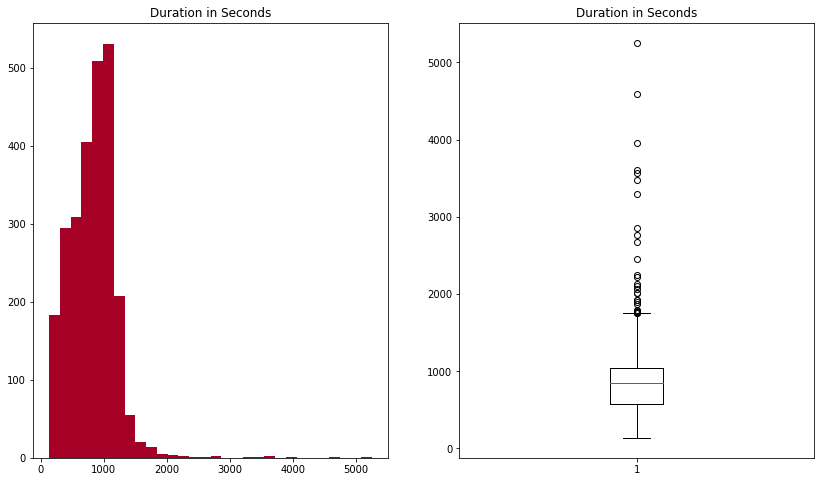

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['duration'], bins=30)
plt.title('Duration in Seconds')

plt.subplot(1, 2, 2)
plt.boxplot(ted['duration'])
plt.title('Duration in Seconds')

plt.show()

##### Interestingly, some talks lasted way longer than the rest.  
#### Let's also see what the distribution looks like for talks in the 99th percentile.

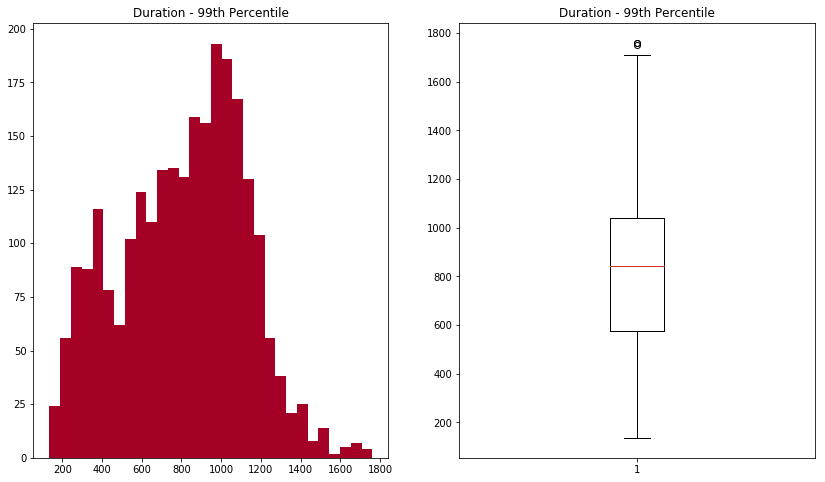

In [27]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['duration'][ted['duration'] < ted['duration'].quantile(0.99)], bins=30)
plt.title('Duration - 99th Percentile')

plt.subplot(1, 2, 2)
plt.boxplot(ted['duration'][ted['duration'] < ted['duration'].quantile(0.99)])
plt.title('Duration - 99th Percentile')

plt.show()

##### Without the extreme values, it's easier to get a visual idea of the duration of the talks. It looks like most talks were around 1000 seconds.  

### Views
Now let's check out the number of views each talk has received.

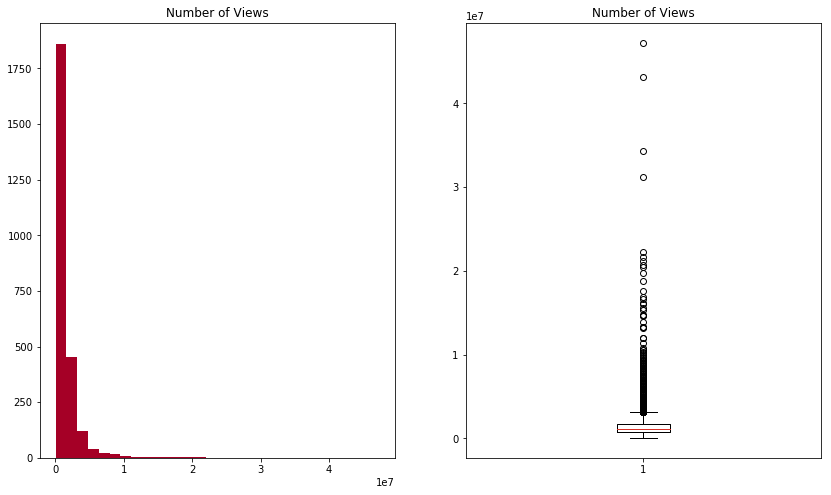

In [11]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['views'], bins=30)
plt.title('Number of Views')

plt.subplot(1, 2, 2)
plt.boxplot(ted['views'])
plt.title('Number of Views')

plt.show()

##### The distribution of the views looks very similar to that of the comments, due to some extreme outliers. Let's see what it looks like when we remove the top 10%.

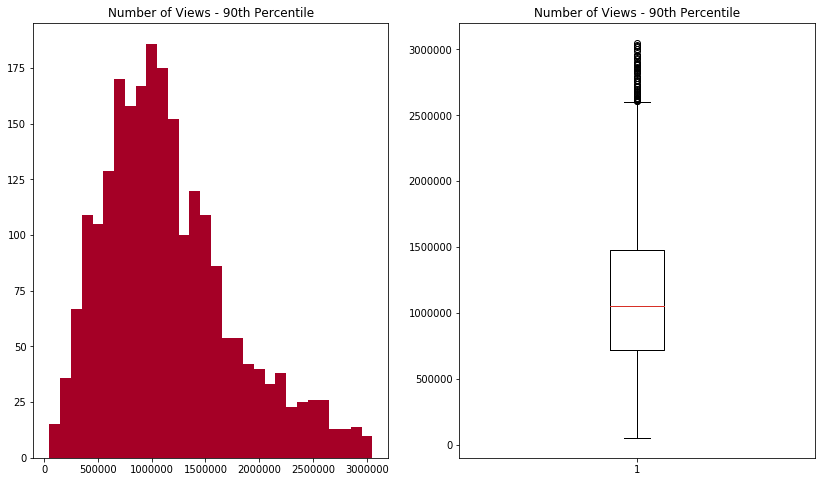

In [21]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['views'][ted['views'] < ted['views'].quantile(0.9)], bins=30)
plt.title('Number of Views - 90th Percentile')

plt.subplot(1, 2, 2)
plt.boxplot(ted['views'][ted['views'] < ted['views'].quantile(0.9)].reset_index(drop=True))
plt.title('Number of Views - 90th Percentile')

plt.show()

#### After removing the upper quartile, once again, it's easier to get an idea of how the variable is distributed. 

### Speaker Occupation

The occupation of the main speaker. Let's explore this variable a bit.

In [37]:
len(ted['speaker_occupation'].unique())

1459

There's **1459** unique values for speaker occupation.  
Let's see what the top 10 most common are.

In [36]:
ted['speaker_occupation'].value_counts().head(10)

Writer          45
Artist          34
Designer        34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

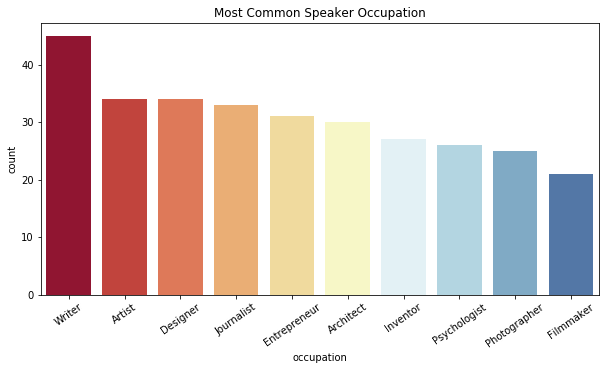

In [49]:
top_occupations = pd.DataFrame(ted['speaker_occupation'].value_counts().head(10)).reset_index()
top_occupations.columns = ['occupation', 'count']

plt.figure(figsize=(10,5))
sns.barplot(x="occupation", y="count", data=top_occupations)
plt.xticks(rotation=35)
plt.title('Most Common Speaker Occupation')
plt.show()

##### The most common occupations are not totally surprising, however it's interesting seeing architect and photographer on the list. I personally assosicate those occupations with being more introverted than the rest.

## Exploratory Scatter plots

### Comments vs Views
Let's explore the relationship between number of comments and number of views.

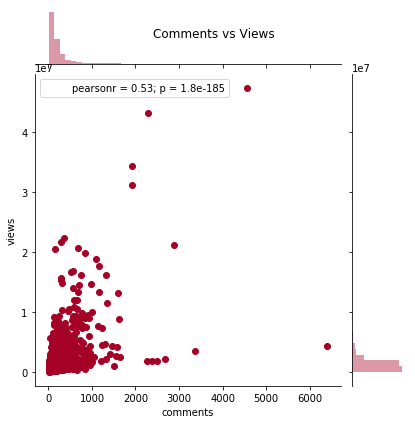

In [64]:
plt.figure(figsize=(8,6))
sns.jointplot(x ='comments', y='views', data=ted)
plt.title('Comments vs Views', x=-2.6, y=1.1)

plt.show()

##### There is a moderate positive correlation between comments and views, which is expected as they are both indicators of popularity.

### Languages vs Views

Let's see if there is an assosciation between number of languages the talk is available in and the number of views.

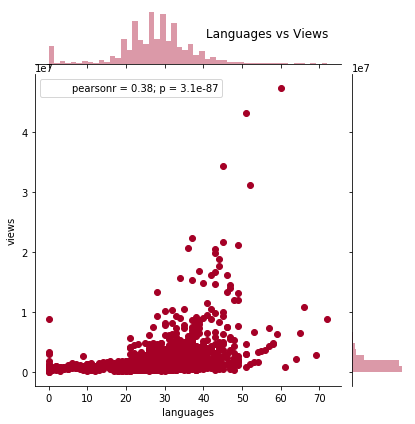

In [66]:
plt.figure(figsize=(8,6))
sns.jointplot(x ='languages', y='views', data=ted)
plt.title('Languages vs Views', x=-1.6, y=1.1)

plt.show()

##### There is a weak positive correlation, which is a bit surprising that it's not stronger. I assumed the more popular talks would be translated into more languages, and that greater accessibility would garner more views.

# Analytic Questions

## 1. What are the most common topics for TED Talks, and are they more popular than average?
If someone is going to give a TED Talk, having a topic seems essential. Now that we understand how some of the variables are distributed, let's take a look at the tags column to see what types of topics are being talked about.  

The tags column is a stringified list of the themes associated with the talk. To help us get an idea of what to talk about, let's see what the most common tags are.

In [70]:
import ast
from collections import Counter
import operator

tags = ted['tags']
all_tags = []
for tag in tags:
    tag_list = ast.literal_eval(tag)
    all_tags += tag_list

tags_count = Counter(all_tags)
sorted_tags = sorted(tags_count.items(), key=operator.itemgetter(1), reverse=True)

print(len(sorted_tags))


416


##### There are 416 unique tags that are assosciated with the different talks. Lets take a look at the most common themes.

In [71]:
sorted_tags[:20] 

[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229),
 ('society', 224),
 ('art', 221),
 ('social change', 218),
 ('future', 195),
 ('communication', 191),
 ('creativity', 189),
 ('biology', 189),
 ('humanity', 182),
 ('collaboration', 174),
 ('environment', 165)]

##### Here we have a list of the top 20 most common tags.  
You can see that technology is the most common tag, which is not surprising considering that TED was originally a tech conference that gradually expanded into other areas. Looking at the list of the top 20 tags, you can get a feeling for the types of talks that get selected.  

#### Now let's see what the most uncommon themes have been over the years.

In [72]:
sorted_tags[-20:]

[('microsoft', 3),
 ('Moon', 3),
 ('mining', 3),
 ('novel', 3),
 ('Brand', 3),
 ('Nobel prize', 3),
 ('3d printing', 3),
 ('forensics', 3),
 ('pandemic', 3),
 ('street art', 3),
 ('blockchain', 3),
 ('epidemiology', 3),
 ('origami', 2),
 ('evil', 2),
 ('augmented reality', 2),
 ('grammar', 2),
 ('skateboarding', 1),
 ('testing', 1),
 ('cloud', 1),
 ('funny', 1)]

##### Here we can see that some of the most uncommon tags are skateboarding, testing, cloud, and funny.  

Do the most common topics get more views than the average talk? It would make sense that popular topics are selected more frequently. Let's take a look.

First we'll make a list of the top 10 most common tags, and then create a column for each one.

In [73]:
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))

In [74]:
def find_tag(x, tag):
    if tag in x:
        return 1
    else:
        return 0

In [75]:
top_tag_list = [x[0] for x in sorted_tags[:10]]

for tag in top_tag_list:
    ted[tag] = ted['tags'].apply(lambda x: find_tag(x, tag))

In [76]:
ted[top_tag_list].head()

,technology,science,global issues,culture,TEDx,design,business,entertainment,health,innovation
0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0


#### Now we'll create a dataframe of the average views for each of the top tags, and include the overall average.

In [77]:
average_views = []

for tag in top_tag_list:
    average_views.append(ted['views'][ted[tag] == 1].mean())
#add the overall view average    
average_views.append(ted['views'].mean())
top_tag_with_overall_avg = top_tag_list + ['overall average']

top_tags_views = pd.DataFrame(
    {'Top Tag': top_tag_with_overall_avg,
     'Average Views': average_views,
     })

In [78]:
top_tags_views

,Average Views,Top Tag
0,1.447328e+06,technology
1,1.579162e+06,science
2,1.264089e+06,global issues
3,2.302286e+06,culture
4,1.573030e+06,TEDx
5,1.346319e+06,design
6,2.117581e+06,business
7,1.931166e+06,entertainment
8,1.668310e+06,health
9,1.424937e+06,innovation


#### Let's look at a barplot of the above dataframe for a visual guide.

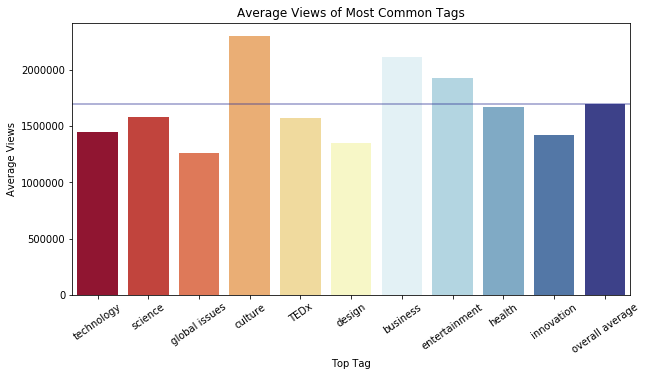

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x="Top Tag", y="Average Views", data=top_tags_views)
plt.axhline(y=1.698297e+06, xmin=0, xmax=1, c=palette[10], alpha=.5)
plt.xticks(rotation=35)
plt.title('Average Views of Most Common Tags')

plt.show()

##### Out of the most common topics, only culture, business, and entertainment have above average views.

## 2. How are viewers rating the talks, and how does that relate to views?
#### The ratings column is a list of 14 dictionaries that coresponds to the possible reactions that viewers can select for each talk.  
For any give talk, the viewer can select up to 3 of the possible reactions. If only 1 reaction is selected, it will be counted 3 times.
#### They are:
* Informative 
* Confusing 
* Jaw-dropping 
* Ingenious 
* Persuasive 
* Inspiring 
* Longwinded 
* Unconvincing 
* Fascinating 
* OK 
* Beautiful 
* Courageous 
* Funny 
* Obnoxious  

#### Let's take a look at how viewers have rated the talks, and how that relates to number of views:

#### First we'll create a column for each of the possible reactions. Each column will be populated with the number of times the talk received that specific reaction.

In [86]:
possible_ratings = ["Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"]

ted['ratings'] = ted['ratings'].apply(ast.literal_eval)

In [87]:
def get_rating_count(x, rating):
    for i in x:
        if i['name'] == rating:
            return i['count']

In [88]:
for index, item in enumerate(possible_ratings):
    ted[item] = ted['ratings'].apply(lambda x: get_rating_count(x, item))

In [89]:
ted[possible_ratings].head()

,Informative,Confusing,Jaw-dropping,Ingenious,Persuasive,Inspiring,Longwinded,Unconvincing,Fascinating,OK,Beautiful,Courageous,Funny,Obnoxious
0,7346,242,4439,6073,10704,24924,387,300,10581,1174,4573,3253,19645,209
1,443,62,116,56,268,413,113,258,132,203,58,139,544,131
2,395,27,54,183,230,230,78,104,166,146,60,45,964,142
3,380,32,230,105,460,1070,53,36,132,85,291,760,59,35
4,5433,72,3736,3202,2542,2893,110,67,4606,248,942,318,1390,61


#### Now let's look at the summary statistics for the rating columns.

In [91]:
ratings = ted[["Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"]]

In [92]:
ratings.describe()

,Informative,Confusing,Jaw-dropping,Ingenious,Persuasive,Inspiring,Longwinded,Unconvincing,Fascinating,OK,Beautiful,Courageous,Funny,Obnoxious
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,348.013333,20.955294,148.057647,150.739608,220.086275,530.214902,32.683922,52.767843,314.164314,81.238039,192.293725,164.723529,154.468627,26.001176
std,540.225980,31.552561,553.879757,283.800437,466.774759,1314.509665,41.608618,91.678632,624.535809,90.321214,477.375664,433.805453,589.137728,53.443249
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.250000,5.000000,18.250000,26.000000,37.000000,113.000000,9.000000,12.000000,79.000000,32.000000,26.000000,20.000000,8.000000,6.000000
50%,212.000000,12.000000,42.000000,69.000000,97.000000,233.500000,19.000000,27.000000,162.000000,55.500000,68.000000,51.000000,21.000000,13.000000
75%,401.000000,24.000000,110.750000,170.750000,225.750000,497.750000,41.000000,60.000000,344.000000,99.000000,190.750000,149.000000,92.000000,27.000000
max,9787.000000,531.000000,14728.000000,6073.000000,10704.000000,24924.000000,447.000000,2194.000000,14447.000000,1341.000000,9437.000000,8668.000000,19645.000000,1361.000000


##### Looking at the means, you can see that informative, inspiring, and fascinating were the most common reactions.

#### First let's look at the overall count of ratings and how that relates to number of views.

In [93]:
ratings.sum()

Informative      887434
Confusing         53436
Jaw-dropping     377547
Ingenious        384386
Persuasive       561220
Inspiring       1352048
Longwinded        83344
Unconvincing     134558
Fascinating      801119
OK               207157
Beautiful        490349
Courageous       420045
Funny            393895
Obnoxious         66303
dtype: int64

#### Let's add a column for the total number of ratings each talk received.

In [94]:
ted['total_ratings'] = ratings.sum(axis=1)

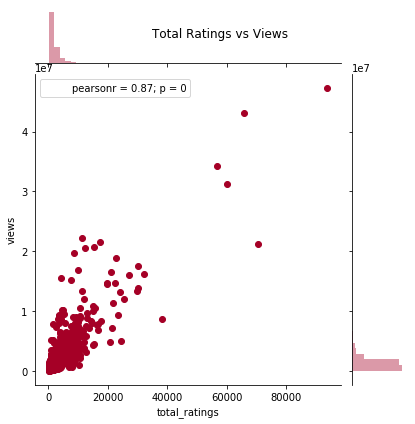

In [125]:
plt.figure(figsize=(8,8))
sns.jointplot(x='total_ratings', y='views', data=ted)
plt.title('Total Ratings vs Views', x=-2.5, y=1.1)

plt.show()

##### Not surprisingly, there is a strong correlation between the number of views and the total number of reactions.

#### Now we'll take a look at the break down of the different ratings for each talk.
Let's add a percentage column for each possible rating. This number is the percent of the total ratings that reaction received. 

In [100]:
for rating in possible_ratings:
    ted[rating + "_percent"] = ted[rating] / ted['total_ratings']

#### Let's see what the distribution of different reactions look like.

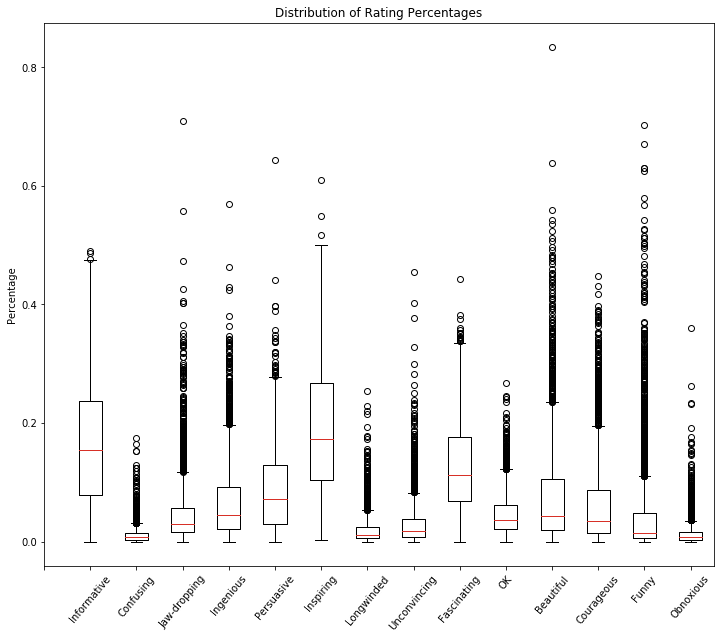

In [111]:
percent_columns = []
for rating in possible_ratings:
    percent_columns += [rating + "_percent"]

percentages = ted[percent_columns]

plt.figure(figsize=(12,10))
plt.boxplot(percentages.values, widths=0.5)
plt.title('Distribution of Rating Percentages')
plt.xticks(np.arange(15), ("", "Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"), rotation=50, ha='center')
plt.ylabel('Percentage')
plt.show()

#### This gives us a good idea of how the different possible reactions relate to each other, which is interesting since viewers can only pick up to 3 for each talk. One thing I spotted is there is one talk that over 80% of viewers rated as 'beautiful'.

In [112]:
ted[ted['Beautiful_percent'] > .8]['name']

972    Robert Hammond: Building a park in the sky
Name: name, dtype: object

#### Robert Hammond: Building a park in the sky
Interesting. It's a talk about the Highline Park in NYC. Remind me to add that to my watch list.

#### Let's see if there is a correlation between talks that receive a high percentage of a certain rating, and number of views.

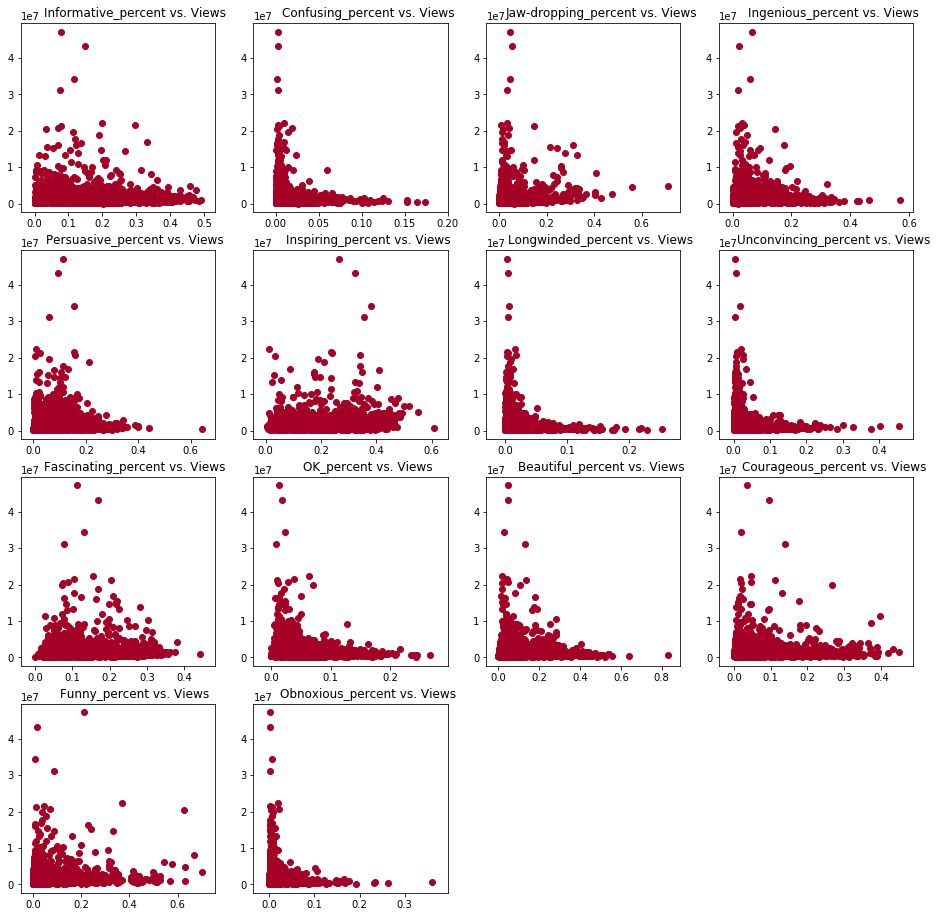

In [140]:
from scipy.stats import pearsonr

plt.figure(figsize=(16,16))

for index, column in enumerate(percent_columns):
    plt.subplot(4, 4, index + 1)
    plt.scatter(ted[column], ted['views'])
    plt.title(column + " vs. Views", x=.59)
        
plt.show()

##### It doesn't look like there is much of a correlation between any of the rating percentages and views, But let's take a look at the correlation coefficient for each.

In [146]:
ted[percent_columns + ['views']].corr()['views']

Informative_percent    -0.068093
Confusing_percent      -0.113815
Jaw-dropping_percent    0.095330
Ingenious_percent      -0.049897
Persuasive_percent     -0.012586
Inspiring_percent       0.102570
Longwinded_percent     -0.156965
Unconvincing_percent   -0.131837
Fascinating_percent     0.050411
OK_percent             -0.151895
Beautiful_percent      -0.020500
Courageous_percent     -0.002256
Funny_percent           0.136401
Obnoxious_percent      -0.112817
views                   1.000000
Name: views, dtype: float64

##### As you can see, there isn't much of a correlation between the percent a certain rating was given and total views. 

## 3. What is the relationship between publish date and total views?

Talks that have been on the site longer have had more time to rack up views. Conversely, TED events have grown in popularity over time and there could be greater interest in newer talks. Let's explore these factors so we can understand what's at play. 

In [147]:
import datetime

##### First let's convert the Unix timestamp into a readable date.

In [183]:
ted['published_date_datetime'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

##### Next, let's add a year column so we can easily compare the year-by-year of the data.

In [184]:
ted['year_published'] = ted['published_date_datetime'].apply(lambda x: x.split('-')[0])

If you recall from earlier, the number of views column has a lot of extreme outliers. To get a better idea of the overall trend, let's again work with just the 90th percentile.  
#### Here's the same plot from before showing the full number of views for reference:

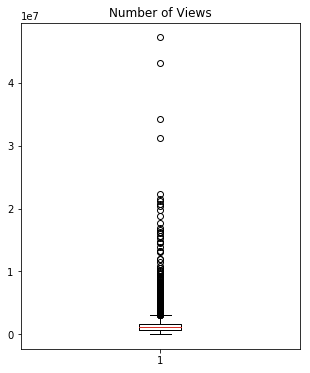

In [162]:
plt.figure(figsize=(5,6))
plt.boxplot(ted['views'])
plt.title('Number of Views')

plt.show()

### Let's see how the yearly number of view is distributed.

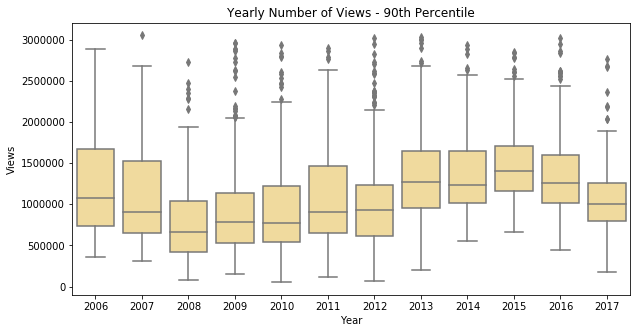

In [177]:
plt.figure(figsize=(10,5))
sns.boxplot(x='year_published', y='views', data=ted[ted['views'] < ted['views'].quantile(0.9)], color=palette[4])
plt.title('Yearly Number of Views - 90th Percentile')
plt.ylabel('Views')
plt.xlabel('Year')
plt.show()

##### From 2008 to 2015 there seems to be a steady increase in views. Interestingly though, even with the top outliers removed, 2006 still has the highest median views until 2013.  

### Total talks per year and mean views per year.
Let's take a look at the total number of talks each year. This  is one indicator of how the overall popularity of TED has changed over time, and might provide some insight. In addition, let's see what the mean number of views per year looks like, and maybe we can get some insight from the two.

In [185]:
yearly_talks = pd.DataFrame(ted['year_published'][ted['views'] < ted['views'].quantile(0.9)].value_counts().reset_index())

In [179]:
yearly_views_subset = pd.DataFrame(ted[ted['views'] < ted['views'].quantile(0.9)].groupby('year_published')['views'].mean().reset_index())

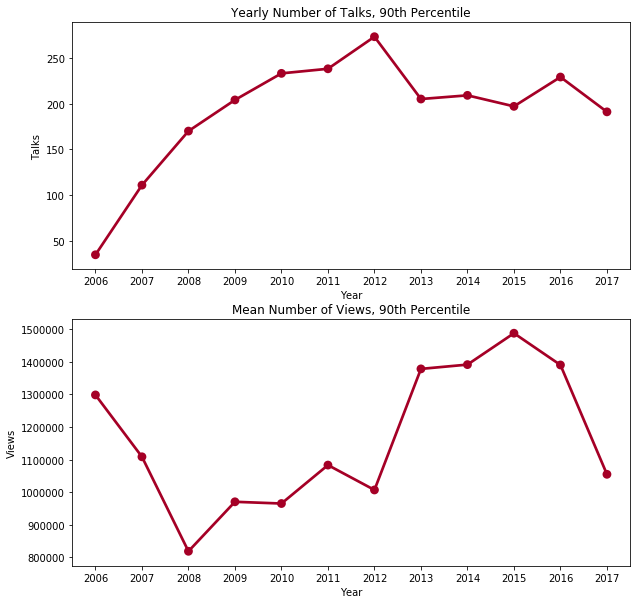

In [187]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.pointplot(x='index', y='year_published', data=yearly_talks)
plt.title('Yearly Number of Talks, 90th Percentile')
plt.ylabel('Talks')
plt.xlabel('Year')

plt.subplot(2, 1, 2)
sns.pointplot(x='year_published', y='views', data=yearly_views_subset)
plt.title('Mean Number of Views, 90th Percentile')
plt.ylabel('Views')
plt.xlabel('Year')

plt.show()

Wow, the number of talks per year grew rapidly from 2006 to 2008, while the mean number of views sharply decreased over that same period. There seems to be a lot of factors involved here. One possibility is that while the number of talks was growing, the viewer base wasn't quite keeping up. Assuming that people have a limited amount of time they can afford to spend watching online videos, the average views decreased. 



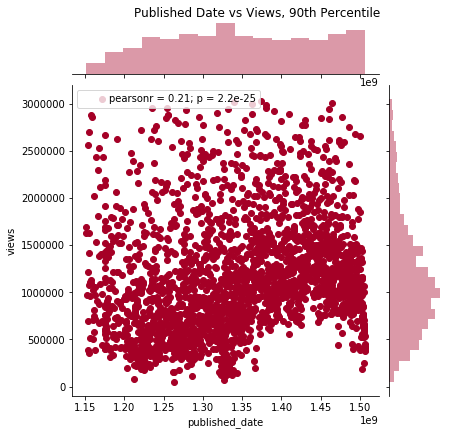

In [195]:
plt.figure(figsize=(6,6))

sns.jointplot(x='published_date', y='views', data=ted[ted['views'] < ted['views'].quantile(0.9)])
plt.title('Published Date vs Views, 90th Percentile', x=-2.5, y=1.2)
plt.show()

As you can see in the above figure, using the Unix timestamp, there is a very weak correlation between publish date and views. Which as I touched on above, could be related to the the number of talks increasing at a faster rate than the viewer base.

### Before and after 2012
In the plot above of mean views per year, there is a sharp jump at 2012. Let's explore this jump to see if the difference in views before 2012 and after 2012 is statistically significant.

In [199]:
ted['before_2012'] = ted['year_published'].apply(lambda x: True if int(x) < 2012 else False)

In [201]:
#Remove top 10% and split into seperate dataframes
ted_90th = ted[ted['views'] < ted['views'].quantile(0.9)]
ted_before_2012 = ted_90th[ted_90th['before_2012'] == True]
ted_after_2012 = ted_90th[ted_90th['before_2012'] == False]

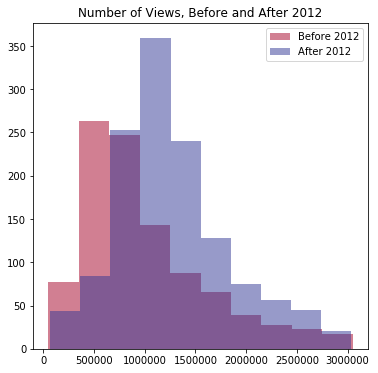

In [211]:
plt.figure(figsize=(6,6))
plt.hist(ted_before_2012['views'], alpha=0.5, label='Before 2012', color=palette[0]) 
plt.hist(ted_after_2012['views'], alpha=0.5, label='After 2012', color=palette[10]) 
plt.legend(loc='upper right')
plt.title('Number of Views, Before and After 2012')
plt.show()

Let's take a look at the T-value for the two groups.

In [212]:
from scipy.stats import ttest_ind
print(ttest_ind(ted_before_2012['views'], ted_after_2012['views'], equal_var=False))

Ttest_indResult(statistic=-11.076656618591329, pvalue=9.9596421666036625e-28)


**T-value =-11.076656618591329  
P-value = 9.9596421666036625e-28**

This t-value shows that there is a significant difference between the two groups.

# Further research ideas


## 1. Predict how many views a new talk will get.
One area of further research that could be done with this data is predicting how many views a talk is going to get. To do this, one could use various types of supervised learning (linear regression, random forrest) to predict how popular newly added talks will be.

## 2. build a recommendation tool to suggest what talks the viewer would like.
Another possible research idea would be to build a recommendation tool to suggest other talks to watch. This could be done using collaborative filtering to group users together based on what talks they watch and how they rate them. Then suggest other videos that similar users have liked.